<a href="https://colab.research.google.com/github/Daun1la/MosTransProect/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [ ]:
LiveSquare=190000
WorkSquare=214000
# areaValue = #Площадь
# areaType = #Тип площади

# peakTime=#время пика
# peakType=#тип распределения
# peakValue=16000*2#кол-во людей в пике

# rateCapable =#доля трудоспособного населения
# rateComm =#доля ОТ/ИТ
# rateOccupancy =#коэф заполняемости авто

lambda1=600 # Вместимость вагона
wagonNumber = 1#кол-во вагонов в составе
trainDelay = 5 #min
jitter = 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dayStart = 6
dayEnd = 24

def addPeak(df, peakType, peakValue, peakWidth=0, peakTime=8):
    if peakType=='uniform':
        birthTime = np.random.uniform(dayStart*60*60,dayEnd*60*60,size=peakValue)
    elif peakType=='normal':
        rng = np.random.default_rng()
        birthTime = rng.normal(loc=60*60*peakTime, scale =60*60*peakWidth,size=peakValue)
    # elif peakType='gaussian':
    #     pass
    birthStation = np.random.choice([1,2,3],p=[0.6,0.33,0.07],size=peakValue)
    deathTime = np.zeros(peakValue)
    dfTemp = pd.DataFrame({'birthTime':birthTime,
                           'deathTime':deathTime,
                           'birthStation':birthStation})
    df = pd.concat([df, dfTemp])
    return df

def trainGenerator(trainDelay,jitter):
    trainDelay = float(trainDelay)
    jitter = float(jitter)

    df = pd.DataFrame()
    df['PeopleOnStationBeforeDeparture'] = pd.Series([])
    df['PeopleOnStationAfterDeparture'] = pd.Series([])
    df['CountOfArrivedFromHouse'] = pd.Series([])
    df['CountOfArrivedFromWork'] = pd.Series([])

    arriveTime = (np.arange(dayStart*60*60,dayEnd*60*60,trainDelay*60))
    arriveTime += np.random.uniform(-jitter*60,jitter*60,size=len(arriveTime))
    df['arriveTime'] = pd.Series(arriveTime)

    return df

<ipython-input-194-dd1d27fa9cf4>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dfTemp])


(5.0, 24.0)

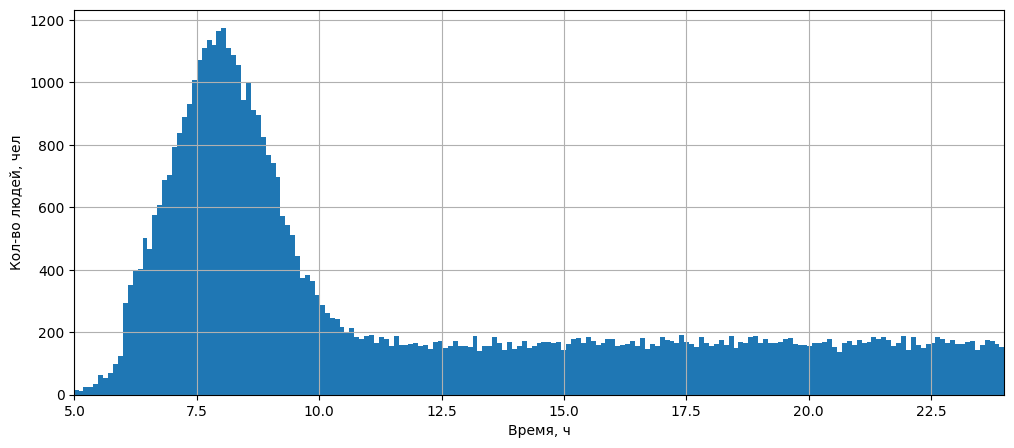

In [ ]:
df = pd.DataFrame()
df['birthTime'] = pd.Series([])
df['birthStation'] = pd.Series([])
df['deathTime'] = pd.Series([])

df = addPeak(df, peakType='uniform', peakValue=30000)
df = addPeak(df, peakType='normal', peakValue=24000, peakWidth=1, peakTime=8)
df.sort_values(by=['birthTime'],inplace=True)
df.reset_index(inplace=True)


Train = trainGenerator(trainDelay,jitter)
plt.figure(figsize = (12,5))
(df.birthTime/60/60).hist(bins = 200)
# plt.title('asd')
plt.xlabel('Время, ч')
plt.ylabel('Кол-во людей, чел')
plt.xlim(5,24)

In [ ]:

# df
# lambda1=500
# x = (np.arange(5.0*60*60,25*60*60,5*60))
# x += np.random.uniform(-2*60,2*60,size=len(x))

# Train=pd.DataFrame()
# Train['TimeOfArrive'] = pd.Series(x)
# Train['PeopleOnStationBeforeDeparture'] = pd.Series([])
# Train['PeopleOnStationAfterDeparture'] = pd.Series([])
# Train['CountOfArrivedFromHouse'] = pd.Series([])
# Train['CountOfArrivedFromWork'] = pd.Series([])
# Train.hist(bins=1000)
# plt.figure(figsize=(19,2))
df1 = pd.DataFrame()
df1['birthTime'] = pd.Series([])
df1['birthStation'] = pd.Series([])
df1['deathTime'] = pd.Series([])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# lam, size = 60*60*[0.5,2,10],  #ширина пика генерации[сек], кол-во людей
#A=np.random.poisson(lam=(60*60*0.5,60*60*2,60*60*10),size=(N,3))
# df.TimeOfBirth=x
# df.TimeOfBirth += 60*60*6 #смещение генерации на 8 утра
# A = df.TimeOfBirth/60/60
# df['A']
# A.hist(bins=100)
# rng = np.random.default_rng()
# s = rng.normal(loc=60*60*8, scale =60*60*1,size=(N))
# x = (np.arange(6.0*60*60,24*60*60,1*10))
# x += np.random.uniform(-1*2,1*2,size=len(x))
# s = pd.DataFrame(np.append(s,x))
# # s=s/60/60
# x=np.random.choice([1,2,3],p=[0.6,0.33,0.07],size=len(s))
# df.StationLocation=x
# s.hist(bins=1000)
# df.TimeOfBirth=s
# print(len(df.TimeOfBirth),len(s))
# df.sort_values(by=['birthTime'],inplace=True)
# df.reset_index(inplace=True)

In [ ]:
# len(df.TimeOfBirth)

<ipython-input-199-ff5e4edc8571>:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.StationLocation=x


(5.0, 24.0)

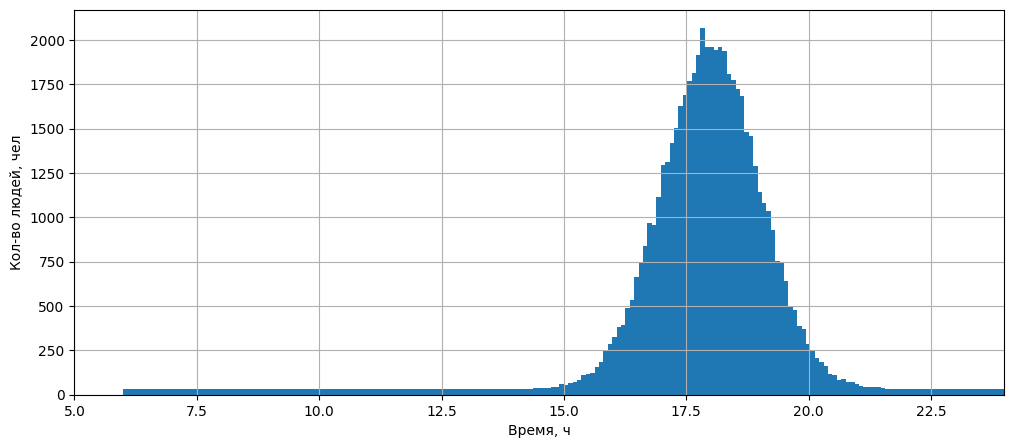

In [ ]:

# lam, size = 60*60*[0.5,2,10],  #ширина пика генерации[сек], кол-во людей
#A=np.random.poisson(lam=(60*60*0.5,60*60*2,60*60*10),size=(N,3))
# df.TimeOfBirth=x
# df.TimeOfBirth += 60*60*6 #смещение генерации на 8 утра
# A = df.TimeOfBirth/60/60
# df['A']
# A.hist(bins=100)
rng = np.random.default_rng()
s = rng.normal(loc=60*60*18, scale =60*60*1,size=(N))
x = (np.arange(6.0*60*60,24*60*60,1*10))
x += np.random.uniform(-1*2,1*2,size=len(x))
s = pd.DataFrame(np.append(s,x))
# s=s/60/60
x=np.random.choice([1,2,3],p=[0.36,0.42,0.22],size=len(s))
df1.StationLocation=x
# s.hist(bins=1000)
df1.birthTime=s
df1.sort_values(by=['birthTime'],inplace=True)
df1.reset_index(inplace=True)
# df1.birthTime.hist(bins=1000)
plt.figure(figsize = (12,5))
(df1.birthTime/60/60).hist(bins = 200)
# plt.title('asd')
plt.xlabel('Время, ч')
plt.ylabel('Кол-во людей, чел')
plt.xlim(5,24)

In [ ]:
#С учетом количества вагонов в поезде, которое часто составляет от 6 до 10, общая вместимость может варьироваться от 900 до 2000 человек за один рейс.
#В среднем один стандартный вагон метро может вместить около 150-200 человек.
lambda1=600 # Увозит со станции кол-во людей
mu1=600     # Привозит количество людей
counter=0
globalcounter=0
peoplecounter=0
N = len(df)
for x in Train.arriveTime:
  while df.birthTime[globalcounter]<x and globalcounter+1<N:
    globalcounter+=1
    peoplecounter+=1
  Train.loc[counter,'PeopleOnStationBeforeDeparture']=globalcounter
  Train.loc[counter,'CountOfArrivedFromHouse']=peoplecounter
  counter+=1
  peoplecounter=0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
counter=0
globalcounter=0
peoplecounter=0
for x in Train.arriveTime:
  while df1.birthTime[globalcounter]<x and peoplecounter<mu1 and globalcounter+1<N:
    globalcounter+=1
    peoplecounter+=1
  Train.loc[counter,'PeopleOnStationBeforeDeparture']+=peoplecounter
  Train.loc[counter,'CountOfArrivedFromWork']=peoplecounter
  counter+=1
  peoplecounter=0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Train.PeopleOnStationAfterDeparture=Train.PeopleOnStationBeforeDeparture
counter=0
globalcounter=0
peoplecounter=0
Traincounter=0

for x in Train.arriveTime:
  while df.birthTime[globalcounter]<x and counter<lambda1 and globalcounter+1<N:
    df.loc[globalcounter,'deathTime']=x
    counter+=1
    globalcounter+=1
  Train.loc[Traincounter:len(Train.PeopleOnStationAfterDeparture),'PeopleOnStationAfterDeparture']-=counter
  Train.loc[Traincounter,'PeopleOnStationAfterDeparture']-=Train.CountOfArrivedFromWork[Traincounter]
  Traincounter+=1
  counter=0

df['duration'] = df.deathTime - df.birthTime
mask = df['duration']<0
df = df[~mask]
# df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6.0, 24.0)

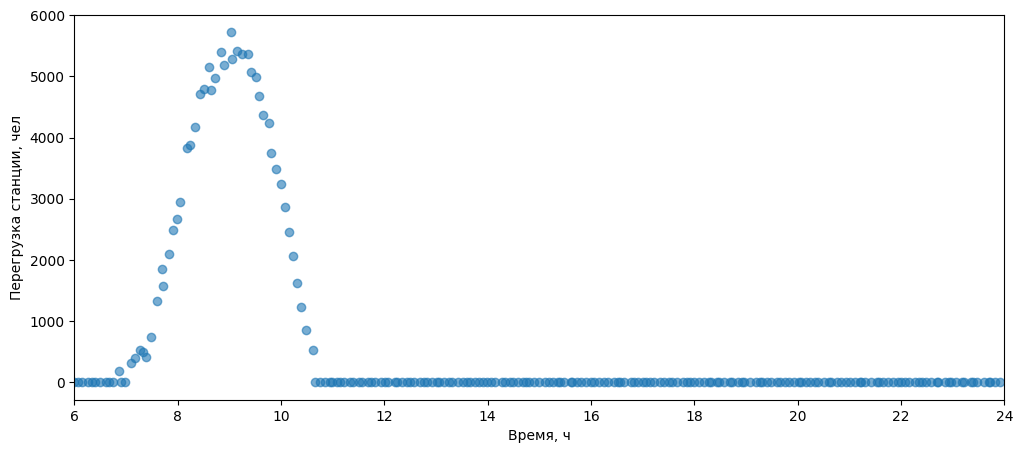

In [ ]:
plt.figure(figsize = (12,5))
plt.scatter(Train.arriveTime/60/60, Train.PeopleOnStationAfterDeparture,alpha=.6)
plt.xlabel('Время, ч')
plt.ylabel('Перегрузка станции, чел')
plt.xlim(6,24)

(0.0, 60.0)

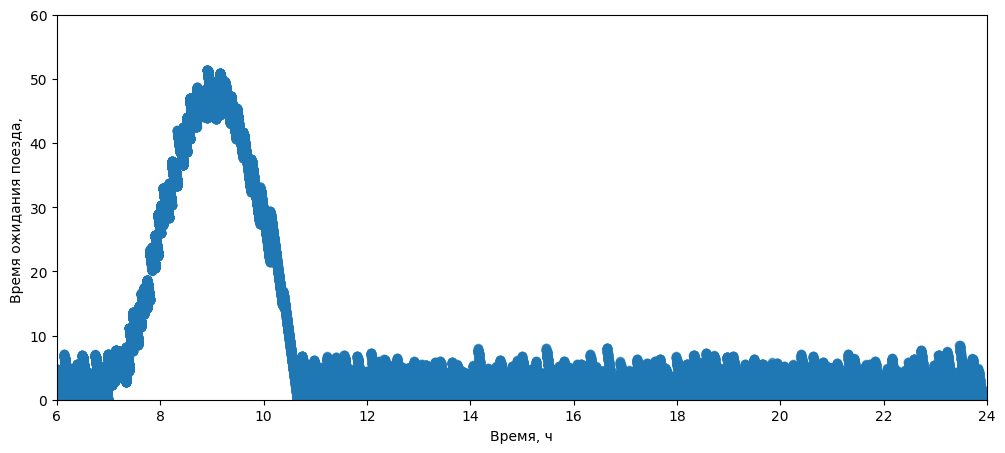

In [ ]:
plt.figure(figsize = (12,5))
plt.scatter(df.birthTime/60/60, df.duration/60,alpha=.6)
plt.xlabel('Время, ч')
plt.ylabel('Время ожидания поезда, ')
plt.xlim(6,24)
plt.ylim(0,60)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


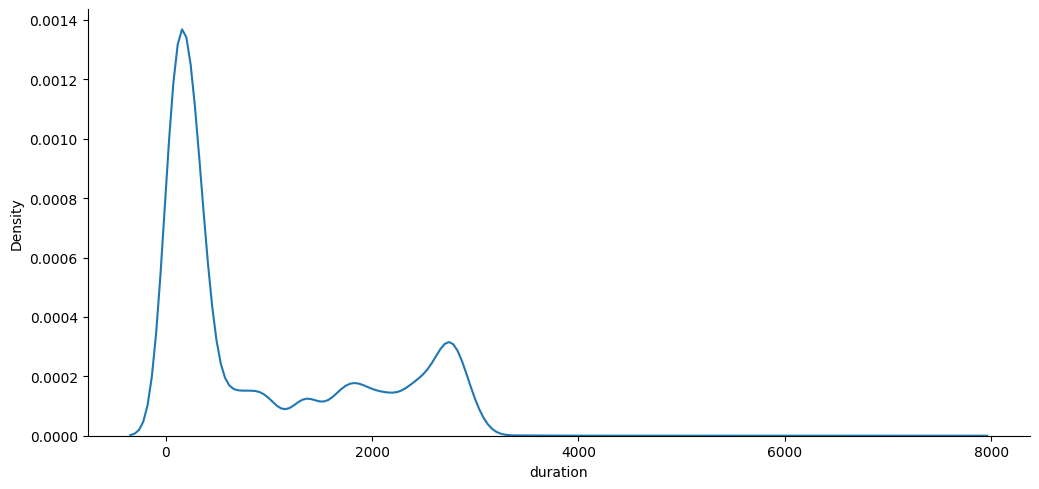

Среднее время ожидания поезда: 933.1664373118257


In [ ]:
plt.figure(figsize = (12,5))
sns.displot(df.duration,kind='kde', aspect=2.1)
plt.show()
meanDuration = np.mean(df.duration)
print(f'Среднее время ожидания поезда: {meanDuration}')